In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

tgf = pd.read_excel('tgf_normalizado.xlsx')
sp = pd.read_excel('spF_normalizado.xlsx')

In [51]:
tgf_dados = np.array(tgf['tgf'])
sp_dados = np.array(sp['Valores de SP medio filtrado e normalizado'])
dados = pd.DataFrame({'tgf': tgf_dados, 'sp': sp_dados})

In [52]:
t0 = 2012.083333 # Ano-Mês inicial
dt = (1)/(12) # Intervalos de 1 mês
N = tgf_dados.size
t = np.arange(0,N) * dt + t0
freq = np.fft.fftfreq(N,d=dt)

fft_tgf = np.fft.fft(tgf_dados)
fft_sp = np.fft.fft(sp_dados)

print(freq[1:])

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9 -6.  -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.
 -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6
 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2
 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8
 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1]


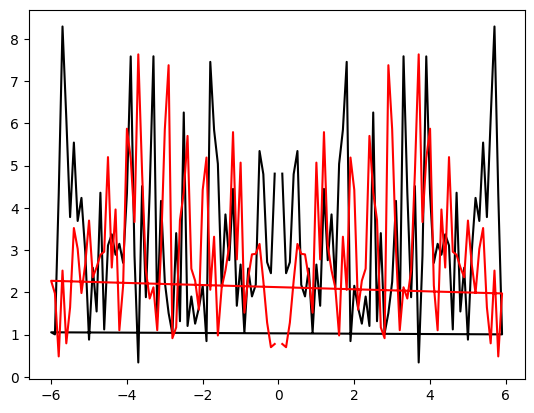

In [53]:
plt.plot(freq[1:], np.abs(fft_tgf[1:]), color='k')
plt.plot(freq[1:], np.abs(fft_sp[1:]), color = 'r')

In [54]:
tgf_abs = np.abs(fft_tgf)
sp_abs = np.abs(fft_sp)

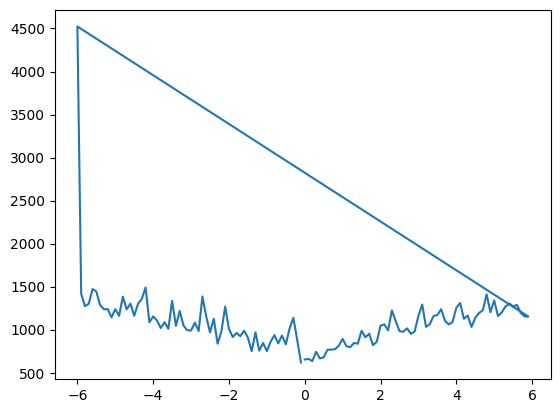

In [55]:
correlacao = sc.signal.correlate(tgf_abs,sp_abs, mode='same')
# plt.vlines(2017+1/12,ymin=0, ymax=5000, colors='r')
plt.plot(freq, correlacao)